<a href="https://colab.research.google.com/github/turkson-michael/Machine-learning-/blob/main/Linear_Regression_You.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as ps
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

## Data Creation

In [ ]:
start, end,step = 0,1,0.02
weight, bias=0.7,0.3
X = torch.arange(start, end,step). unsqueeze(dim=1)
X.shape
y = weight* X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
len(X_train),len(y_train)

(40, 40)

# Plotting training, testing

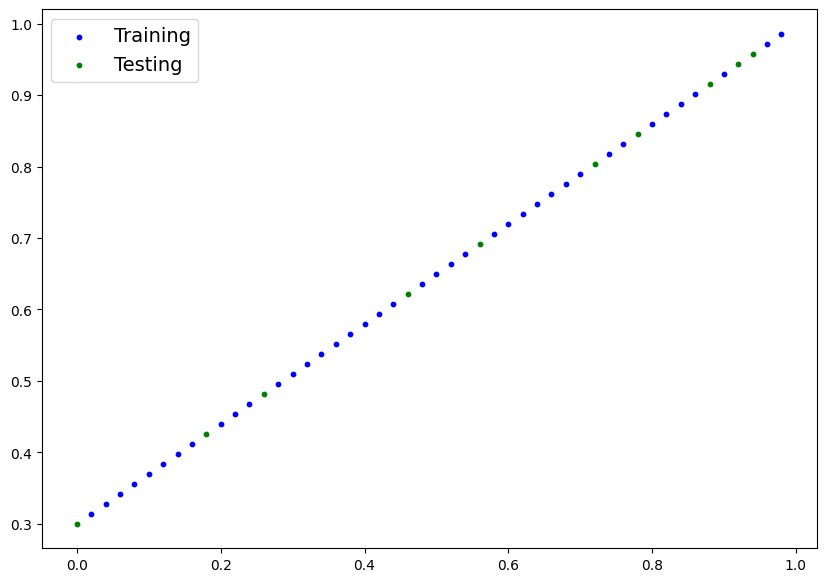

In [ ]:
def train_test_plot( train_data= X_train,
                     train_label= y_train,
                     test_data= X_test,
                     test_label =y_test,
                     predictions= None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label,s=10, c='blue', label='Training')
    plt.scatter(test_data, test_label,s=10, c= 'green', label='Testing')

    if predictions is not None:
       plt.scatter(test_data, predictions,s=10,c='red', label= 'predictions')
    plt.legend(prop={'size':14});

train_test_plot();

# Building a model

In [ ]:
class LinearModel(nn.Module):
      def __init__(self):
          super().__init__()
          self.weights =nn.Parameter(torch.randn(1,
                                    requires_grad=True,dtype=torch.float))
          self.bias= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

      def forward(self,x:torch.Tensor)-> torch.Tensor:
          return self.weights *x +self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Making predictions using inference_mode()
with torch.inference_mode():
     y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3712],
        [0.4453],
        [0.3174],
        [0.1894],
        [0.2163],
        [0.1288],
        [0.4251],
        [0.4386],
        [0.3914],
        [0.2837]])


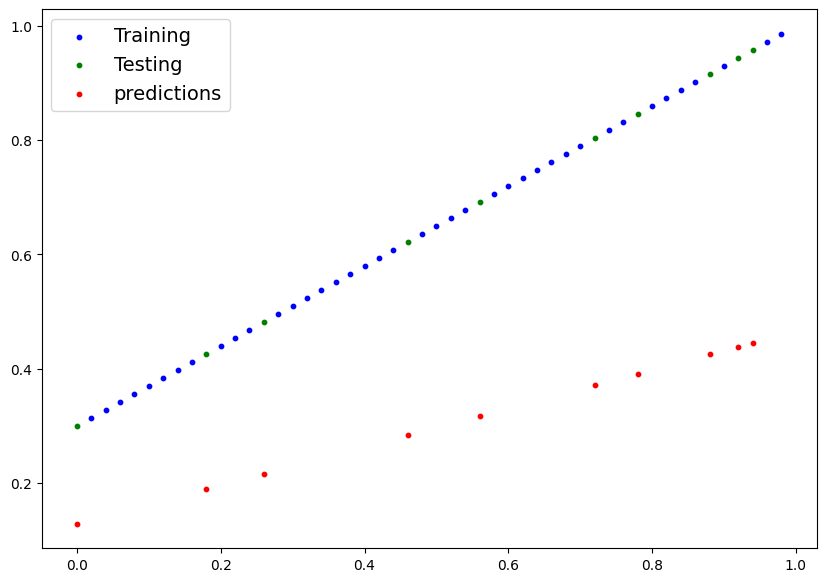

In [ ]:
train_test_plot(predictions=y_preds);

In [ ]:
y_test-y_preds

tensor([[0.4328],
        [0.5127],
        [0.3746],
        [0.2366],
        [0.2657],
        [0.1712],
        [0.4909],
        [0.5054],
        [0.4546],
        [0.3383]])

# Training the model

In [ ]:
# Create a loss and optimization function
loss_fn = nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                      lr=0.01)

In [ ]:
epochs=100
epoch_count=[]
train_loss_values=[]
test_loss_values=[]


for epoch in range(epochs):
    #Training put the model in training mode
    model_0.train()

    #1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred,y_train)

    #3. Zero grad of optimizer
    optimizer.zero_grad()

    #4. Back propagation
    loss.backward()

    #5. Step the optimizer ( progress)
    optimizer.step()


    ## Testing
    model_0.eval()
    with torch.inference_mode():
         test_pred = model_0(X_test)
         test_loss = loss_fn(test_pred, y_test)

         if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f'Epoch: {epoch}| MAE Train loss: {loss} | MAE test loss: {test_loss}')

Epoch: 0| MAE Train loss: 0.3419461250305176 | MAE test loss: 0.36559805274009705
Epoch: 10| MAE Train loss: 0.21985606849193573 | MAE test loss: 0.23880799114704132
Epoch: 20| MAE Train loss: 0.10246703773736954 | MAE test loss: 0.12307681143283844
Epoch: 30| MAE Train loss: 0.05749161168932915 | MAE test loss: 0.07557658851146698
Epoch: 40| MAE Train loss: 0.04770669341087341 | MAE test loss: 0.05893605947494507
Epoch: 50| MAE Train loss: 0.04242600500583649 | MAE test loss: 0.0506942979991436
Epoch: 60| MAE Train loss: 0.03778873011469841 | MAE test loss: 0.04508671909570694
Epoch: 70| MAE Train loss: 0.03318120911717415 | MAE test loss: 0.039479129016399384
Epoch: 80| MAE Train loss: 0.02857370115816593 | MAE test loss: 0.033871542662382126
Epoch: 90| MAE Train loss: 0.023966172710061073 | MAE test loss: 0.028263960033655167


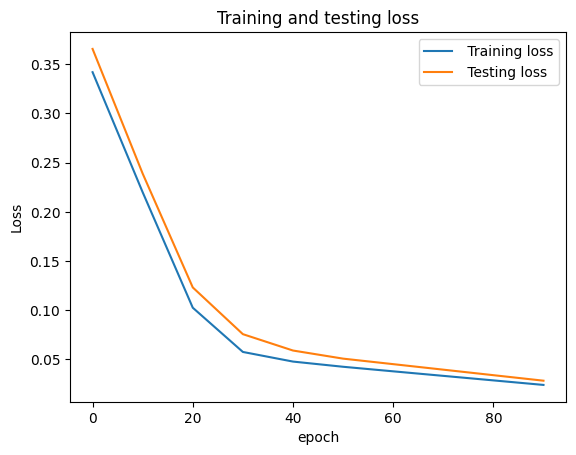

In [ ]:
# Plotting the Loss curves
plt.plot(epoch_count,train_loss_values,label= ' Training loss')
plt.plot(epoch_count,test_loss_values,label=' Testing loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Training and testing loss')
pkt.legend();

In [ ]:
# Find the model's learned parameters

print('The model learned the following values for weight and bias')
print(model_0.state_dict())
print('\nAnd the original values for weight and bias are:')
print(f'Weight: {weight},bias: {bias}')

The model learned the following values for weight and bias
OrderedDict([('weights', tensor([0.6193])), ('bias', tensor([0.3403]))])

And the original values for weight and bias are:
Weight: 0.7,bias: 0.3


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.7862],
        [0.9225],
        [0.6871],
        [0.4518],
        [0.5013],
        [0.3403],
        [0.8853],
        [0.9101],
        [0.8234],
        [0.6252]])

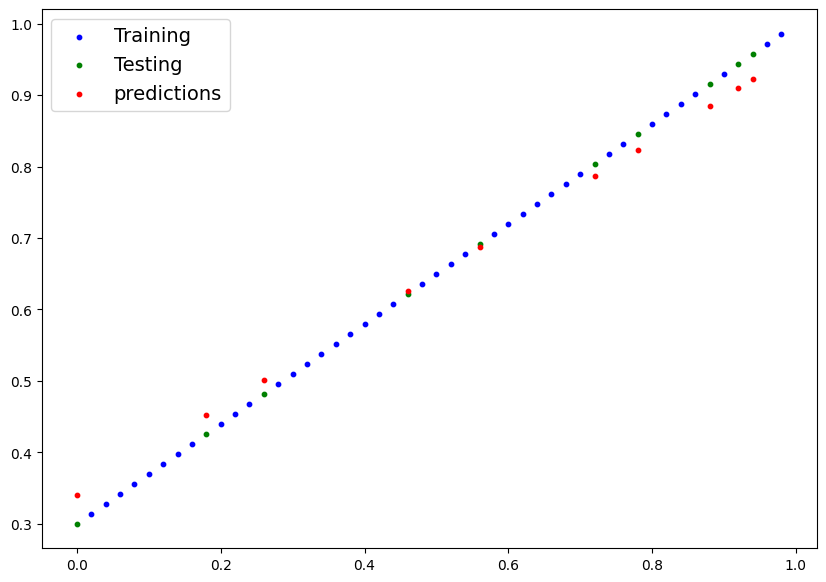

In [ ]:
train_test_plot(predictions=y_preds);

# Saving and Loading a model

In [ ]:

from pathlib import Path
#Create a model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

In [ ]:
# Create a Model save path
MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
# Save the model state dict
print(f'saving model to : {MODEL_SAVE_PATH}')
torch.save(obj= model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
# CHECK THE SAVE FILE PATH
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Apr 23 18:14 models/01_pytorch_workflow_model_0.pth


In [ ]:
# Loading a saved model

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare a previous model Param
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Setting device agnostic code

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'